# TF-IDF clustering

In [1]:
!pip install pythainlp
!pip install pandas
!pip install numpy
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 26.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = '/content/drive/MyDrive/Final_project/clean_data/combine_company.csv'

In [4]:
import pandas as pd
import numpy as np
from pythainlp.corpus import thai_stopwords

In [5]:
df = pd.read_csv(data)
frozen_stopword = thai_stopwords()

In [6]:
# Clean stop word and special charater
import string
import re
from pythainlp.tokenize import word_tokenize
list_stopword = [frozen_stopword]

def clean_tokenize(text:str) -> list:
  for pair in (('\n', ''), ('\t', ''), ('!', '')):
        text =text.replace(*pair)
  text = text.strip()
  text = text.lower()
  temp = ""
  for k in range(len(text)):
    if text[k] not in string.punctuation and (text[k] not in string.digits):
      temp+=text[k]
  # clean_token = text.translate(str.maketrans('', '', string.punctuation))
  # clean_token = text.translate(str.maketrans('', '', string.digits))
  temp_tokenize = word_tokenize(temp, None, 'newmm', False)
  return temp_tokenize

In [7]:
# List company detail
"""
  ตัดรายละเอียดธุรกิจเป็นคำๆ แล้วใส่ในตัวแปร list_company_detail
"""

list_company_detail = []
for i in range(len(df)):
  temp_comp = clean_tokenize(df.iloc[i]['รายละเอียดธุรกิจ'])
  list_company_detail.append(temp_comp)

# หาค่า TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
def identity_fun(text):
    return text

In [10]:
tfidf_vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=identity_fun,
    preprocessor=identity_fun,
    token_pattern=None
)

tfidf_vector= tfidf_vectorizer.fit_transform(list_company_detail)
tfidf_array = np.array(tfidf_vector.todense())

#แปลงเป็น DataFrame เพื่อง่ายแก่การอ่าน
df1 = pd.DataFrame(tfidf_array,columns=tfidf_vectorizer.get_feature_names_out())
df1

,a,aaa,ab,abap,abeam,ablerex,about,abroad,academic,acceptance,...,’,“,“ท,“ส,“เบ,”,•,…,™,≥
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.061622,0.0,0.0,0.0,0.060441,0.0,0.0,0.0,0.0
1639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [11]:
print(df1.iloc[600:611].apply(lambda s: s.nlargest(10).index.tolist(), axis=1).ravel())

[list(['claire', 'agent', 'chat', 'travel', 'การท่องเที่ยว', 'with', 'center', 'learning', 'machine', 'จัด'])
 list(['visualization', 'ค้นคว้า', 'knowledge', 'marketplace', 'uxui', 'วิจัย', 'database', 'search', 'engine', 'chatbot'])
 list(['ตำแหน่งงาน', 'เทค', 'เอเชีย', 'ที่รวม', 'สตาร์ท', 'อัพ', 'ชั้นนำ', 'ฯ', 'ตำแหน่ง', 'กว่า'])
 list(['contractor', 'มายัง', 'สั่งสินค้า', 'onsite', 'แม่นยำ', 'หน้า', 'sales', 'รวดเร็ว', 'automation', 'webmobile'])
 list(['facebooklinegoogle', 'marketing', 'online', 'advertising', 'consulting', 'design', 'digital', 'web', 'บริการ', 'a'])
 list(['โปรโมชั่น', 'อันดับ', 'กิจกรรม', 'แบรนด์', 'รวบรวม', 'การตลาด', 'ทุก', 'รวมถึง', 'webmobile', 'สินค้า'])
 list(['game', 'arts', 'mobilegame', 'developer', 'publisher', 'publishing', 'development', 'เกม', 'เกี่ยวกับ', 'ecommerce'])
 list(['website', 'youtube', 'instagram', 'packaging', 'branding', 'advertising', 'app', 'facebook', 'agency', 'ลักษณะ'])
 list(['ออเดอร์', 'facebook', 'couponqr', 'mar', 'ujung', 'ก

# K-mean clustering

In [12]:
from sklearn.cluster import KMeans

In [13]:
X = df1

In [14]:
# initialize 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# Fit model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [15]:
[c for c in clusters][:-1]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 0,


In [16]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=3, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.values.tolist())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

# Visualize the Clustering

In [17]:
# assign clusters and pca vectors to our dataframe 
df1['cluster'] = clusters
df1['x0'] = x0
df1['x1'] = x1

In [18]:
df1.iloc[600:611, :].apply(lambda s: s.nlargest(5).index.tolist(), axis=1).ravel()

array([list(['cluster', 'claire', 'agent', 'chat', 'travel']),
       list(['cluster', 'visualization', 'ค้นคว้า', 'knowledge', 'marketplace']),
       list(['ตำแหน่งงาน', 'เทค', 'เอเชีย', 'ที่รวม', 'สตาร์ท']),
       list(['cluster', 'contractor', 'มายัง', 'สั่งสินค้า', 'x1']),
       list(['cluster', 'facebooklinegoogle', 'marketing', 'online', 'advertising']),
       list(['cluster', 'โปรโมชั่น', 'อันดับ', 'x1', 'กิจกรรม']),
       list(['cluster', 'game', 'arts', 'mobilegame', 'developer']),
       list(['cluster', 'website', 'youtube', 'instagram', 'packaging']),
       list(['ออเดอร์', 'facebook', 'couponqr', 'mar', 'ujung']),
       list(['โดเมน', 'th', 'ระดับ', 'ไทย', 'ชื่อ']),
       list(['cluster', 'craftsmanship', 'microservices', 'ให้บริการ', 'cybersecurity'])],
      dtype=object)

In [19]:
# map clusters to appropriate labels 
cluster_map = {0: "IT", 1: "AI", 2: "Innovation"}
# apply mapping
df1['cluster'] = df1['cluster'].map(cluster_map)

In [20]:
!pip install matplotlib
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

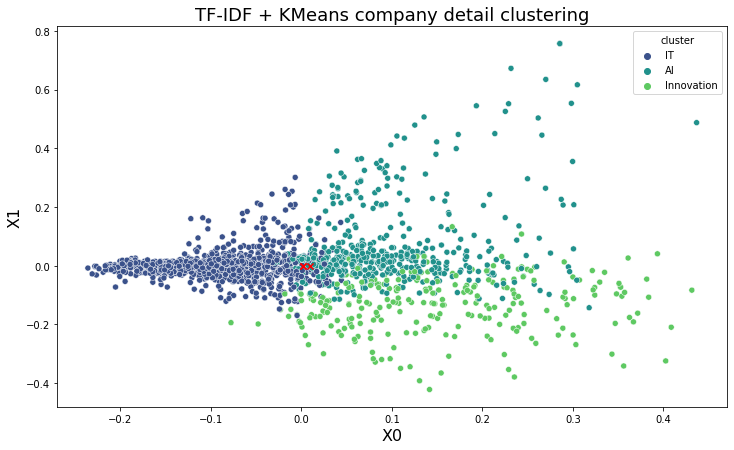

In [22]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans company detail clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
# plt.scatter(x0, x1, c=clusters)
sns.scatterplot(data=df1, x='x0', y='x1', hue='cluster', palette="viridis")
centroids = kmeans.cluster_centers_
# centroids
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='red')
plt.show()